# Decision Trees

## Short Version

[![StatQuest](https://img.youtube.com/vi/7VeUPuFGJHk/0.jpg)](https://www.youtube.com/watch?v=7VeUPuFGJHk)


## Long Version

[![Mlcourseai](https://img.youtube.com/vi/H4XlBTPv5rQ/0.jpg)](https://www.youtube.com/watch?v=H4XlBTPv5rQ)


# Decision Trees for Regression

In [1]:
from sklearn.tree import plot_tree,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
tips = sns.load_dataset("tips")

/Users/mac/anaconda3/envs/Educate/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/mac/anaconda3/envs/Educate/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
tips.sex = tips.sex.map({"Female":0, "Male": 1})
tips.smoker = tips.smoker.map({"No":0, "Yes":1})
tips.day = tips.day.map({"Sun":0,"Sat":1, "Thur":2, "Fri":3})
tips.time = tips.time.map({"Lunch":0, "Dinner":1})

In [3]:
X_train, X_test, y_train, y_test = train_test_split(tips.drop("tip",axis=1),tips.tip)
features = tips.drop("tip",axis=1).columns.tolist()

In [4]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

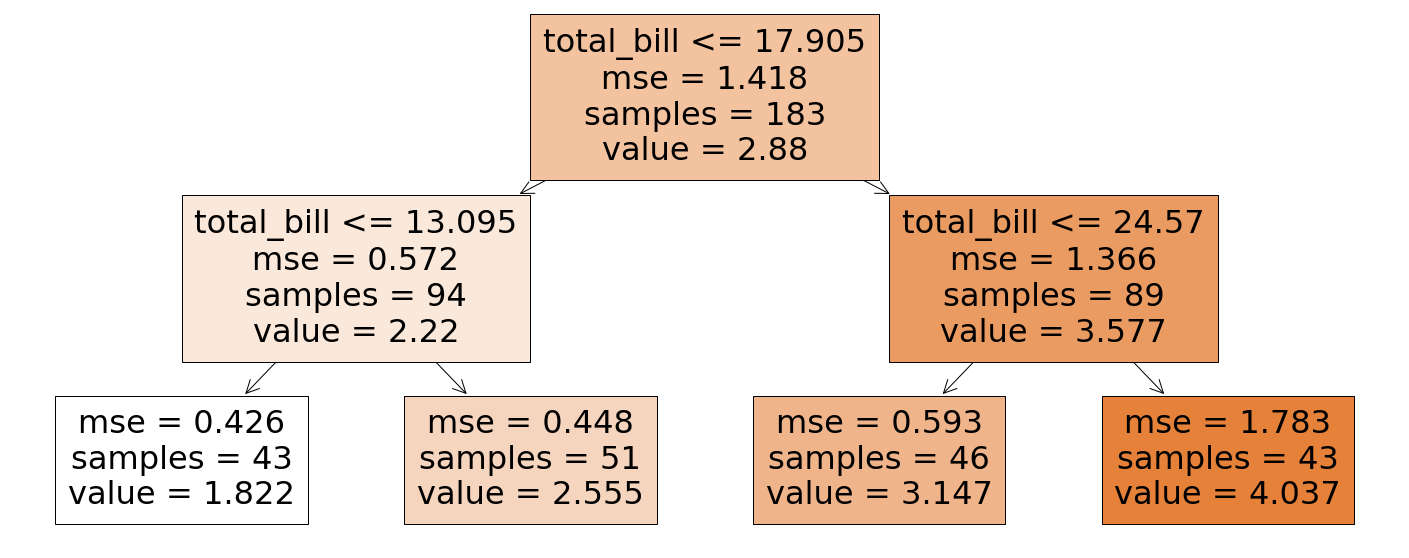

In [5]:
plt.figure(figsize=(25,10))
a = plot_tree(tree,feature_names=features,class_names='tip', filled=True )

Lets see how the tree decides on splits.

### Reduction in Variance for Regression Problems

<p> We denote variance as $$\sigma^2 = \frac{\sum(x-\bar{x})^2}{n}$$ </p>
<p> When building the decision tree the algorithm will split on nodes that result in lower Mean Squared Error. You can check this by looking at the decision tree we have built above. </p>

# Decision Trees for Classification

In [18]:
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.datasets import load_iris

In [20]:
X,y = load_iris(return_X_y=True)
features = load_iris().feature_names
target = ['setosa', 'versicolor', 'virginica']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

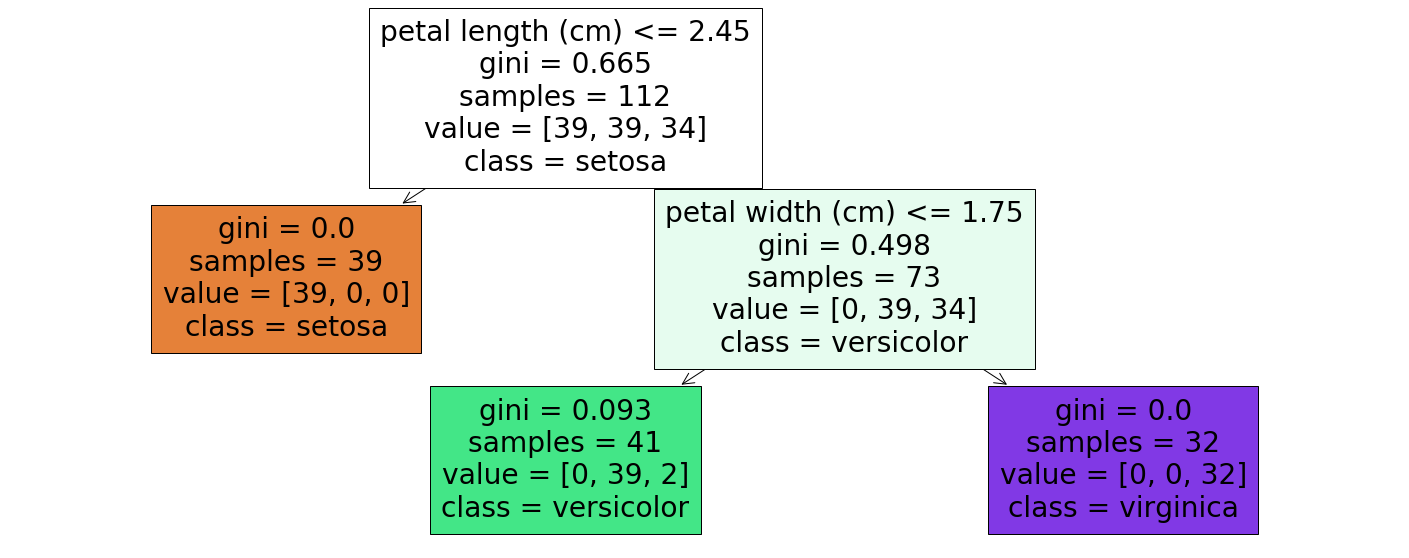

In [24]:
plt.figure(figsize=(25,10))
p = plot_tree(clf,feature_names=features,class_names=target, filled=True)

### Reduction in Gini index for Classification Problems

$$\text{Gini} = 1 - \sum_{i=1}^{C}(p_i)^2$$

We want to split on the smallest Gini index.
<p>If it is perfectly classified the Gini index will return 0 like the split on the far right and the far left.</p>

### Reduction in Entropy for Classification Problems

$$\text{Entropy} = \sum_{i=1}^{C} - p_i\cdot\log_2(p_i)$$
$$\text{Information Gain} = \text{Entropy of parent node} - \text{Entropy of child nodes}$$

Another way to split decision tree nodes is by using Information gain. 
<p>Intuitively we want to split on the nodes that gives the greatest information gain.</p>
<p>In practice both methods split on similar nodes, so you shouldn't worry about which split criterion to pick.</p>

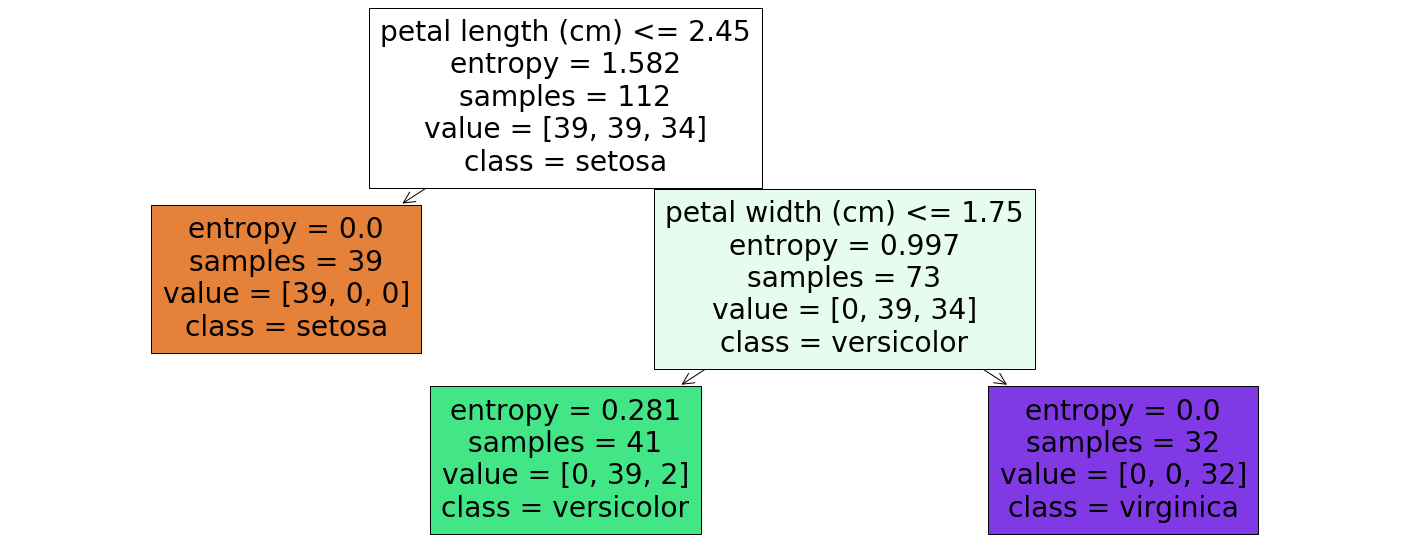

In [25]:
clf = DecisionTreeClassifier(max_depth=2,criterion='entropy')
clf.fit(X_train,y_train)
plt.figure(figsize=(25,10))
p = plot_tree(clf,feature_names=features,class_names=target, filled=True)